In [22]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from tensorflow import keras 
import os 
from sklearn.preprocessing import StandardScaler 

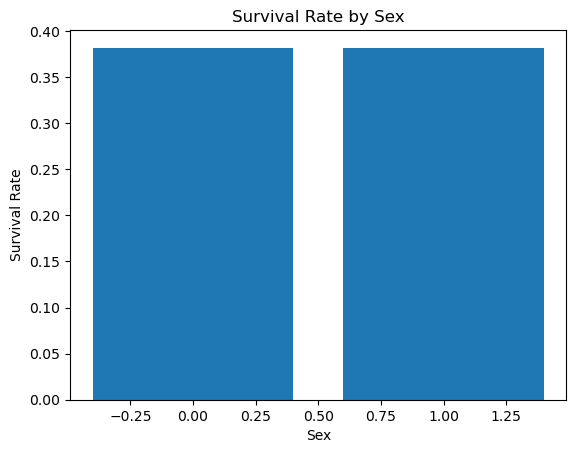

1309
500
809
['name', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest']


In [117]:
titanic = pd.read_csv("./datasets/titanic3.csv")


titanic["sex"] = (titanic["sex"] == "female").astype(int)


# Women denoted as 1, Males as 0


# Create a bar chart of the survival rate by sex
plt.bar(titanic["sex"].unique(), titanic["survived"].mean())
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Sex")
plt.show()

print(titanic["survived"].count()) # print out the number of passengers on the titanic
print(titanic["survived"].sum()) # print out the number of survivors
print((titanic["survived"] == 0).sum()) # print the number of passengers who died


#rlist = [for cols in titanic.columns if cols == "sex" | cols == "survived"]

print([col for col in titanic.columns if titanic[col].dtype == "object"]) # print the type of each column



Source:

Original Owner:

R. K. Bock
Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
http://wwwmagic.mppmu.mpg.de
rkb '@' mail.cern.ch

Donor:

P. Savicky
Institute of Computer Science, AS of CR
Czech Republic
savicky '@' cs.cas.cz 


Attribute Information:

1. fLength: continuous # major axis of ellipse [mm]
2. fWidth: continuous # minor axis of ellipse [mm]
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot]
4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio]
5. fConc1: continuous # ratio of highest pixel over fSize [ratio]
6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm]
7. fM3Long: continuous # 3rd root of third moment along major axis [mm]
8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm]
9. fAlpha: continuous # angle of major axis with vector to origin [deg]
10. fDist: continuous # distance from origin to center of ellipse [mm]
11. class: g,h # gamma (signal), hadron (background) 

In [43]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
magic = pd.read_csv("./datasets/magic04.data", names=cols)
magic["class"] = (magic["class"] == "g").astype(int)

Here we take the columns that we defined as the features of the dataset, and plot histograms of each. This in turn helps us identify which features correspond to a particular type of particle (gamma or hadron) more than the others. For example, if we find that a majority of those with a high fLength are gamma particles, then the probability of a new particle with a high fLength being a gamma particle is higher than that of it being a hadron particle.

There are tons of insights that can be generated using plotted data, and we will explore more of them in the future.

There are also other techniques that are required to preprocess the data, such as scaling, encoding, and splitting the data. We will explore these techniques in the future as well. Preprocessing the data will also help to generate more effective graphs, visualizing data in much better terms than with the raw data.

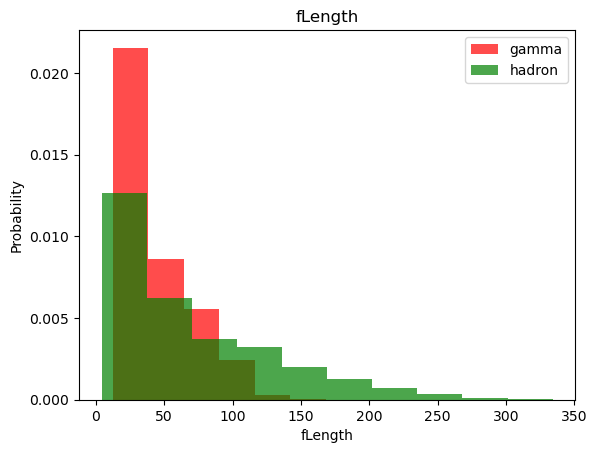

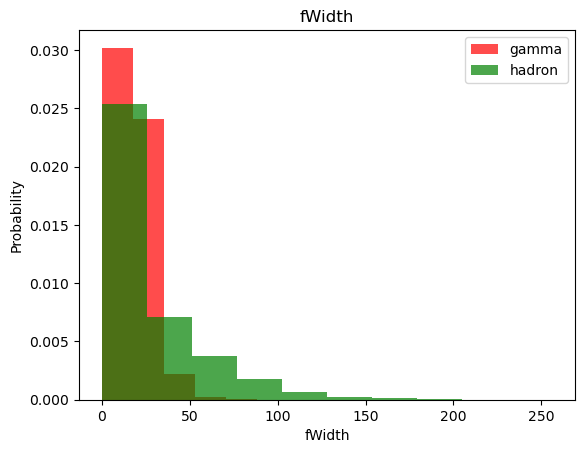

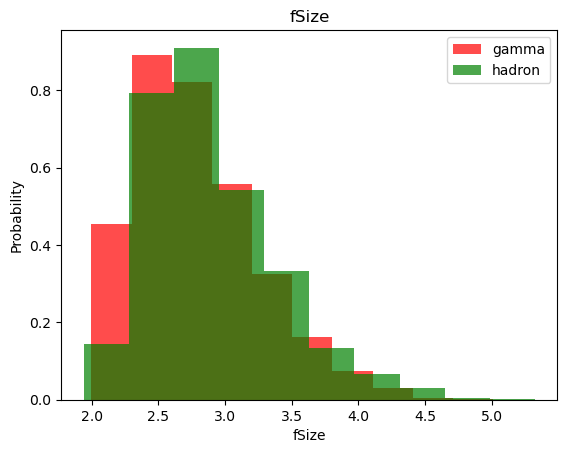

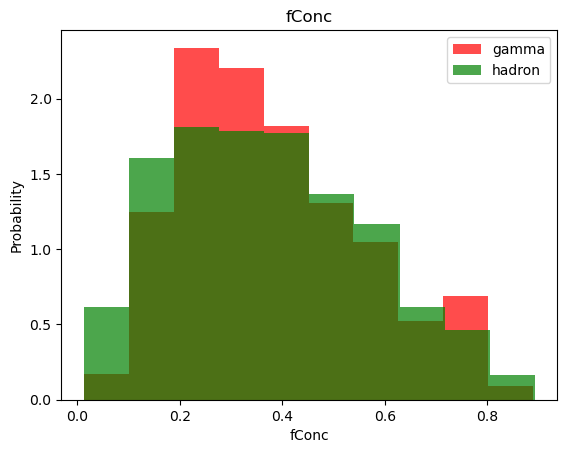

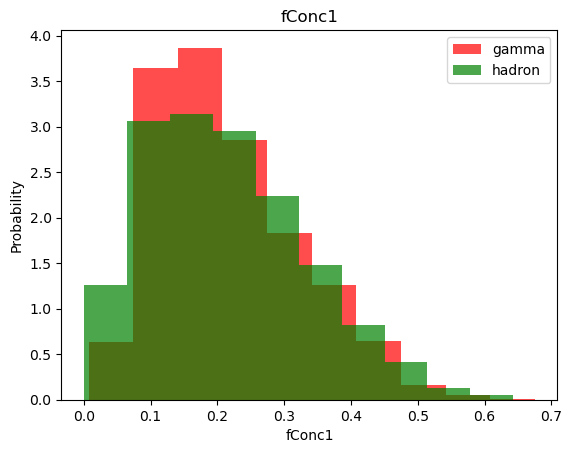

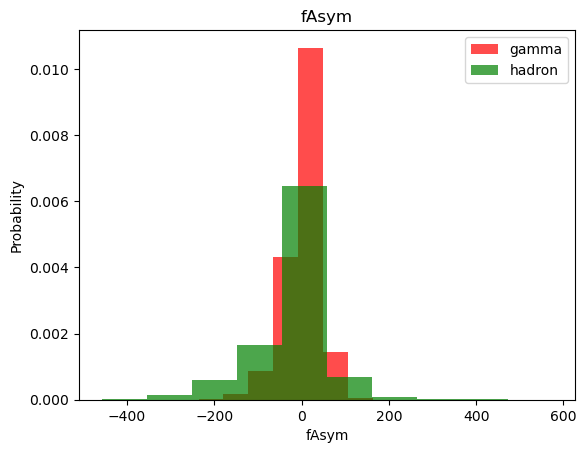

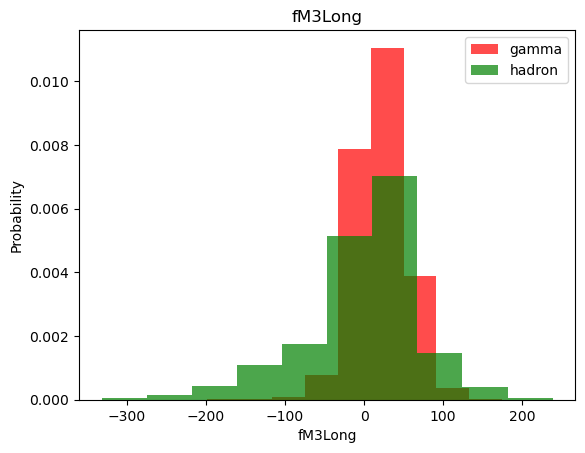

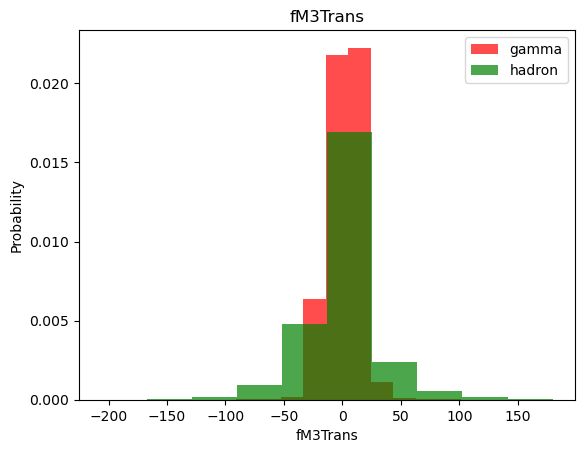

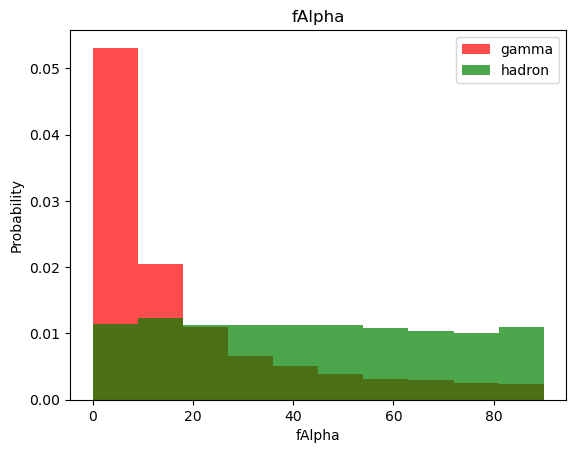

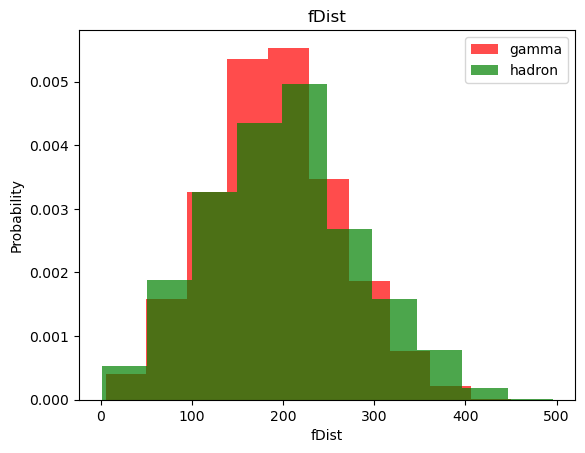

In [118]:
def plot_particle_hist(cols, df):
    for col in cols[:-1]: 
        plt.hist(df[df["class"]==1][col], color="red", alpha=0.7, label="gamma", density=True)
        plt.hist(df[df["class"]==0][col], color="green", alpha=0.7, label="hadron", density=True)
        plt.title(col)
        plt.ylabel("Probability")
        plt.xlabel(col)
        plt.legend()
        plt.show()

plot_particle_hist(cols, magic)

Here we will use the np.split() method to split our entire dataframe into its corresponding training, validation, and testing sets. 

Here is an overview of the parameters passed into the np.split() method: 

1. df.sample(frac=1) - Essentially shuffles the data around, so that the data is not in any particular order.
2. [int(0.6*len(df)), int(0.8*len(df))] - This is the range of the data that will be used for training and validation. 60-80% for training and validation, and 20-40% for testing.

Again, everything between 60-80% of data will go towards training & validation, and the 20-40% will be test. 

In [91]:
train, valid, test = np.split(magic.sample(frac=1), [int(0.6*len(magic)), int(0.8*len(magic))])

We need to classify our data based on the above attributes. 

By looking at the data thus far, we can see that the scaling is off, meaning there are some values which go from X to Y, and some values which
range from arbitrary values such as R and P. We need to scale the data so that it is all on the same scale (could be from 0 to 100, or from -100 to 100, or any valid range).

We'll be using the StandardScaler() to scale the values within the X dataset. 

Here's how they will work: 

1. Separate the entire DataFrame into an x and y, respectively. 
2. Turn both x and y into numpy arrays, which makes it easier to perform operations. 
3. Scale the x values using the StandardScaler() function, which automatically scales it a range. 
4. Combine the x and y values using the np.hstack() function, which takes a tuple of arrays and stacks them horizontally.


In [60]:
def scaling(df, cols):
    x = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values
    scalar = StandardScaler()
    x = scalar.fit_transform(x)
    final_data = pd.DataFrame(np.hstack((x, np.reshape(y, (-1, 1))))) # Stack the data horizontally, adding the y column to the overall x matrix 
    final_data.columns = cols
    return final_data, x, y

data, x, y = scaling(magic, cols)

print(len(data[data["class"] == 1])) # gammas
print(len(data[data["class"] == 0])) # hadrons 


12332
6688
